# Coursera tydzień 8
## Znajdowanie optymalnej liczby klastrów
Chcemy segmentować obraz na kawałki tak by otrzymać jak najdokładniejsze kształty. Oto obraz:

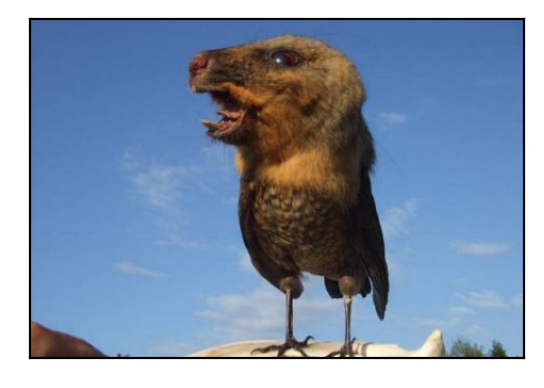

In [1]:
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
# wczytanie obrazu
img = cv2.imread('sowa.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# wyświetlanie obrazu
plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()

Przygotowanie danych do klasteryzacji, zapisujemy w postaci tablicy: pozycja x;pozycja y;R;G;B:

In [2]:
data=np.zeros((img.shape[0]*img.shape[1],5)) # dane zapisane w kolumnie a nie w tablicy
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        data[j+img.shape[1]*i,:]=np.array([i,j,img[i,j,0],img[i,j,1],img[i,j,2]]) # format danych

Podział obrazu na dwa zbiory:

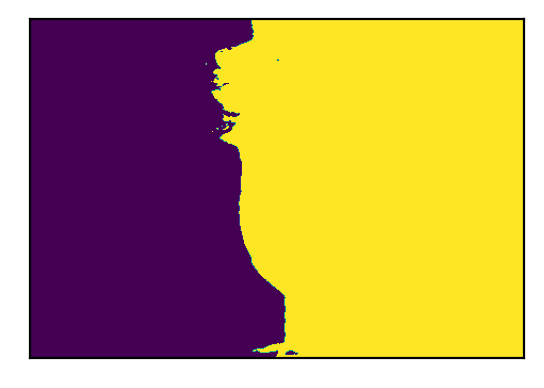

In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)  # wyznaczanie centroid
pred = kmeans.predict(data) # przypisanie do klas według algorytmu
seg=np.zeros((img.shape[0],img.shape[1])) # obraz po podziale
for i,cluster in enumerate(pred):
    seg[int(data[i,0]),int(data[i,1])]=cluster*100;


plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
plt.imshow(seg)
plt.xticks([]), plt.yticks([])
plt.show()

Podział na dwa klastry nie dzieli obrazu na osobne kształty. Zbadajmy jak zachowuje się dla większych liczb klastrów:

Text(0, 0.5, 'Wartość funkcji celu')

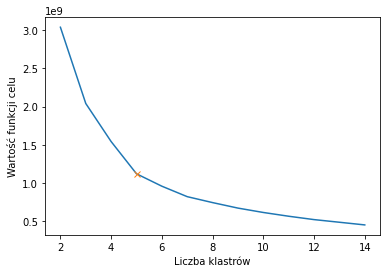

In [4]:
scores=[]
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data) # wyznaczanie centroid
    scores.append(-kmeans.score(data,pred)) # wartość funkcji celu


plt.plot(np.arange(2,len(scores)+2),scores)
plt.plot(5,scores[5-2],'x')
plt.xlabel("Liczba klastrów")
plt.ylabel("Wartość funkcji celu")

Przyjmujemy, że "elbow" jest dla liczby klastrów 5:

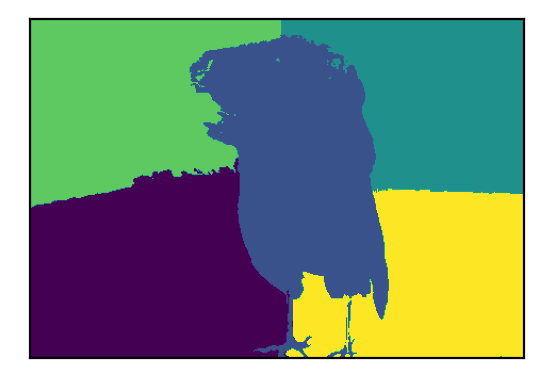

In [5]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data) # wyznaczanie centroid
pred = kmeans.predict(data) #przypisanie do klas według algorytmu
seg=np.zeros((img.shape[0],img.shape[1])) #obraz po podziale
for i,cluster in enumerate(pred):
    seg[int(data[i,0]),int(data[i,1])]=cluster*100;


plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
plt.imshow(seg)
plt.xticks([]), plt.yticks([])
plt.show()

Jak widzimy dzieli on na obszary o podobnych kolorach i blisko siebie. Zobaczmy co będzie, gdy podzielimy obraz na 14 klastrów:

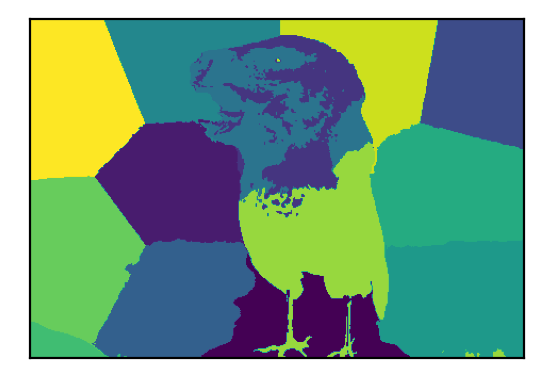

In [6]:
kmeans = KMeans(n_clusters=14, random_state=0).fit(data) # wyznaczanie centroid
pred = kmeans.predict(data) #przypisanie do klas według algorytmu
seg=np.zeros((img.shape[0],img.shape[1])) #obraz po podziale
for i,cluster in enumerate(pred):
    seg[int(data[i,0]),int(data[i,1])]=cluster*20;


plt.figure(figsize=(img.shape[0]/100,img.shape[1]/100), dpi=200)
plt.imshow(seg)
plt.xticks([]), plt.yticks([])
plt.show()

Jak widać większa ilość klastrów dzieli jedynie obszary już podzielone

## PCA Principal Component Analysis

### PCA bez normalizacji - tak sie nie robi
Dla danych, które nie mają średniej w punkcie 0,0:

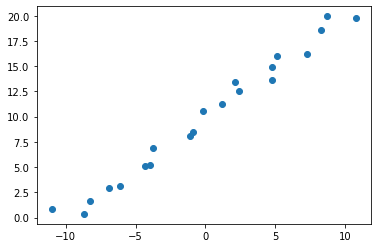

In [7]:
data=np.array([[i,i+10] for i in range(-10,11)]) #przesunięta prosta
data=(data+(np.random.rand(21,2)-0.5)*2).T #dodanie losowych liczb
plt.scatter(data[0,:],data[1,:])

Redukcja wymiarów nie wygląda podejrzanie:

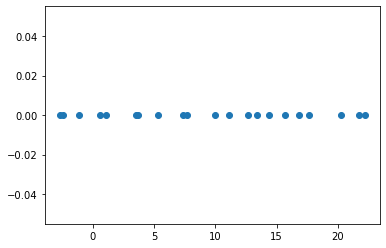

In [8]:
sigma=data@data.T/data.shape[0] #obliczanie sigma u nas X=data
u,s,v=np.linalg.svd(sigma) #rozkład svd
z=(u[0,:]).T@data #redukcja wymiarów
plt.scatter(z,np.zeros((len(z),1)))

Ale rekonstrukcja już tak:

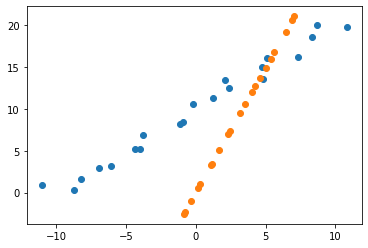

In [9]:
data_rec1=u[0,0]*z
data_rec2=u[0,1]*z
plt.scatter(data[0,:],data[1,:])
plt.scatter(data_rec1,data_rec2)

Punkty rzutowane są na inną prostą i błąd jest trudny do wykrycia.

### Gdy mamy dane o różnych skalach

Przygotujmy nasz zbior danych:

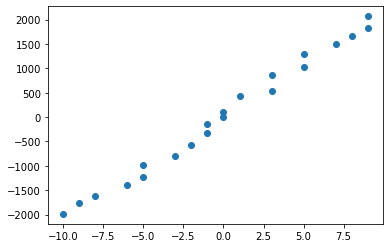

In [10]:
data=np.array([[i,i*200] for i in range(-10,11)]) # prosta o dużym nachyleniu
data[:,0]=data[:,0]+(np.random.rand(21,1)-0.5).T*2 #dodanie losowych liczb
data[:,1]=data[:,1]+(np.random.rand(21,1)-0.5).T*200 #dodanie losowych liczb
data=data.T
plt.scatter(data[0,:],data[1,:])

Zredukujmy wymiar do 1:

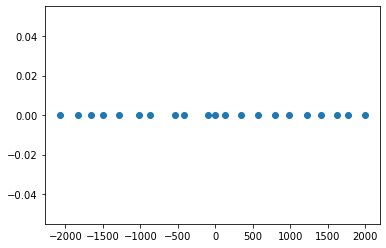

In [11]:
sigma=data@data.T/data.shape[0] #obliczanie sigma u nas X=data
u,s,v=np.linalg.svd(sigma) #rozkład svd
z=(u[0,:]).T@data #redukcja wymiarów
plt.scatter(z,np.zeros((len(z),1)))

Nie widać tu nic dziwnego.<br><br>
Teraz obliczmy rekonstrukcje:

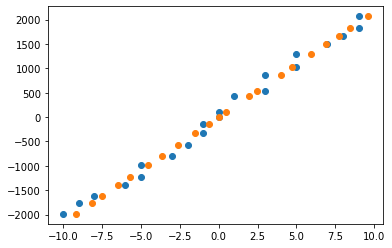

In [12]:
data_rec1=u[0,0]*z
data_rec2=u[0,1]*z
plt.scatter(data[0,:],data[1,:])
plt.scatter(data_rec1,data_rec2)

Algorytm uznał drugą kolumne danych jako ważniejszą od pierwszej, przez co po redukcji wymiarów otrzymujemy dane podobne do drugiej kolumny.